# EDA of CPJ Data on Journalists Killed since 1992

In [1]:
# %load ~/jupyter_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3
plt.style.use('ggplot')

In [2]:
cpj = pd.read_csv('../data/Journalists Killed between 1992 and 2020.csv')
cpj.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2033 non-null   int64  
 1   combinedStatus            2033 non-null   object 
 2   fullName                  2033 non-null   object 
 3   sortName                  0 non-null      float64
 4   primaryNationality        1313 non-null   object 
 5   secondaryNationality      4 non-null      object 
 6   tertiaryNationality       0 non-null      float64
 7   gender                    1459 non-null   object 
 8   photoUrl                  431 non-null    object 
 9   photoCredit               267 non-null    object 
 10  type                      2033 non-null   object 
 11  lastStatus                231 non-null    object 
 12  typeOfDeath               1369 non-null   object 
 13  status                    2033 non-null   object 
 14  employed

In [4]:
# drop columns with all nulls
cpj.dropna(axis=1, how='all', inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   secondaryNationality      4 non-null      object
 5   gender                    1459 non-null   object
 6   photoUrl                  431 non-null    object
 7   photoCredit               267 non-null    object
 8   type                      2033 non-null   object
 9   lastStatus                231 non-null    object
 10  typeOfDeath               1369 non-null   object
 11  status                    2033 non-null   object
 12  employedAs                2025 non-null   object
 13  organizations             2032 non-null   object
 14  jobs                    

In [5]:
cpj.dropna(axis=1, thresh=1000, inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                2033 non-null   int64 
 1   combinedStatus      2033 non-null   object
 2   fullName            2033 non-null   object
 3   primaryNationality  1313 non-null   object
 4   gender              1459 non-null   object
 5   type                2033 non-null   object
 6   typeOfDeath         1369 non-null   object
 7   status              2033 non-null   object
 8   employedAs          2025 non-null   object
 9   organizations       2032 non-null   object
 10  jobs                1398 non-null   object
 11  coverage            1348 non-null   object
 12  mediums             1395 non-null   object
 13  country             2033 non-null   object
 14  location            2019 non-null   object
 15  locality            2009 non-null   object
 16  localOrForeign      1469

What is difference between 'combinedStatus' and 'status'?

In [6]:
cpj['combinedStatus'].value_counts()

Confirmed      1473
Unconfirmed     550
Killed           10
Name: combinedStatus, dtype: int64

In [7]:
cpj['status'].value_counts()

Killed    2033
Name: status, dtype: int64

Status doesn't seem to contain any useful information, so drop it.

In [8]:
cpj.drop(['status'],axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                2033 non-null   int64 
 1   combinedStatus      2033 non-null   object
 2   fullName            2033 non-null   object
 3   primaryNationality  1313 non-null   object
 4   gender              1459 non-null   object
 5   type                2033 non-null   object
 6   typeOfDeath         1369 non-null   object
 7   employedAs          2025 non-null   object
 8   organizations       2032 non-null   object
 9   jobs                1398 non-null   object
 10  coverage            1348 non-null   object
 11  mediums             1395 non-null   object
 12  country             2033 non-null   object
 13  location            2019 non-null   object
 14  locality            2009 non-null   object
 15  localOrForeign      1469 non-null   object
 16  sourcesOfFire       1187

Comparing combinedStatus wiht motiveConfirmed...

In [9]:
cpj['combinedStatus'].value_counts()

Confirmed      1473
Unconfirmed     550
Killed           10
Name: combinedStatus, dtype: int64

In [10]:
cpj['motiveConfirmed'].value_counts()

Confirmed      1369
Unconfirmed     550
Name: motiveConfirmed, dtype: int64

In [11]:
## Might want to limit analysis to only confirmed motives??

Note we only have gender info for 1459 out of 2033 rows.

In [12]:
cpj['gender'].value_counts()

Male      1357
Female     102
Name: gender, dtype: int64

In [13]:
cpj['primaryNationality'].value_counts()

Iraq           166
Syria          124
Philippines     88
Mexico          64
Somalia         63
              ... 
Sweden           1
Slovakia         1
Mozambique       1
Japan            1
Sudan            1
Name: primaryNationality, Length: 102, dtype: int64

## What does the 'type' field represent?


In [14]:
cpj['type'].value_counts()

Journalist      1919
Media Worker     114
Name: type, dtype: int64

In [15]:
cpj['employedAs'].value_counts()

Staff        1706
Freelance     319
Name: employedAs, dtype: int64

In [16]:
cpj.drop(['type','employedAs'],axis=1,inplace=True)

In [17]:
cpj['organizations'].value_counts()

Freelance                               115
freelance                                73
Freelancer                               31
Al-Arabiya                               15
Reuters                                  14
                                       ... 
Sama Salaheddin Channel                   1
El Diario                                 1
Nokh Cho TV                               1
retired radio and newspaper reporter      1
Zweites Deutsches Fernsehen               1
Name: organizations, Length: 1378, dtype: int64

In [18]:
cpj['jobs'].value_counts()

Print Reporter                                278
Broadcast Reporter                            258
Camera Operator                               155
Editor                                        127
Photographer                                   94
                                             ... 
Camera Operator,Editor,Broadcast Reporter       1
Internet Reporter,Camera Operator               1
Broadcast Reporter,Technician                   1
Internet Reporter,Publisher/Owner               1
Camera Operator,Internet Reporter,Producer      1
Name: jobs, Length: 88, dtype: int64

In [19]:
cpj['coverage'].value_counts().to_frame().head(20)

,coverage
War,298
Politics,194
"Politics,War",105
Crime,62
"Human Rights,Politics,War",60
Corruption,59
"Corruption,Crime",56
"Corruption,Politics",49
"Human Rights,War",47
"Human Rights,Politics",42


Some entries have multiple 'coverage' categories listed; need to separate these to get counts for each individual category.

In [21]:
# get the unique values for category

def get_unique_category_vals(df, col_name, dropna=False):
    '''
    Find unique category values for specified column in a dataframe, where some rows 
    contain multiple categories separated by commas.
    '''
    unique_entries = list(cpj[col_name].unique())
    unique_entries = list(map(str,unique_entries))
    unique_entries_split = list(map(lambda x: x.split(','),unique_entries))
    unique_vals = set([val for sublist in unique_entries_split for val in sublist])
    if dropna:
        unique_vals.remove('nan')
    return(unique_vals)

#uvals = get_unique_category_vals(cpj,'coverage')
#print(uvals)


def add_category_counts_to_df(df, col_name, dropna=False):
    '''
    Add boolean columns to dataframe for each unique category in col_name indicating if that category 
    was present in col_name. Useful when some rows of col_name contain multiple categories separated by commas.
    Adding these columns allows us to sum/count each individual category separately.
    '''
    df_new = df.copy()
    unique_vals = get_unique_category_vals(df_new, col_name, dropna)
    
    for val in unique_vals:
        df_new[col_name + '_' + val] = df_new[col_name].apply(str).apply(lambda x: x.split(',')).apply(lambda x: val in x)
    return df_new

#df = cpj.copy()
#df=add_category_counts_to_df(df,'coverage')

#df.loc[:,['year','coverage','coverage_War','coverage_Crime']].head()

def count_categories(df, col_name, dropna=False):
    '''
    '''
    df_count=add_category_counts_to_df(df, col_name, dropna)
    df_count=df_count.filter(regex='^' + col_name, axis=1).sum().to_frame(name='Count').reset_index().rename(columns={'index':col_name}).sort_values('Count',ascending=False)
    df_count[col_name]=df_count[col_name].apply(lambda x: x.replace(col_name +'_',''))
    return df_count


def plot_hbar_category_count_multiplecats(df, col_name, topN=None, dropna=False):
    '''
    Make a horizontal bar chart of category counts for a specified column in dataframe
    '''
    df_count = count_categories(df, col_name, dropna)
    fig, ax = plt.subplots(1,figsize=(12,8))
    ax.barh(df_count[col_name], df_count['Count'])
    ax.set_xlabel('# Journalists Killed')
    if topN:
        ax.set_title('# Journalists Killed By ' + col_name + ' (Top ' + str(topN) +')')
    else:
        ax.set_title('# Journalists Killed By ' + col_name)
    ax.invert_yaxis()
    return 



Issues w/ 'jobs' categories:
- We have 'Broadcast Reporter' and 'Broadcast reporter'

In [44]:
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Broadcast reporter','Broadcast Reporter') if type(x)==str else x)
get_unique_category_vals(cpj, 'jobs', dropna=False)


{'Broadcast Reporter',
 'Camera Operator',
 'Columnist/Commentator',
 'Documentary Filmmaker',
 'Editor',
 'Internet Reporter',
 'Photographer',
 'Print Reporter',
 'Producer',
 'Production manager',
 'Publisher/Owner',
 'Reporter',
 'Technician',
 'nan'}

In [ ]:
cpj['mediums'].value_counts()

In [ ]:
cpj['location'].value_counts()

In [ ]:
cpj['locality'].value_counts()

In [ ]:
cpj.drop(['location','locality'],axis=1,inplace=True)
cpj.info()

In [ ]:
cpj['typeOfDeath'].value_counts()

In [ ]:
cpj['localOrForeign'].value_counts()

In [47]:
def remove_spaces_in_category_lists(df, col_name):
    '''
    Remove spaces in rows of col_name where a list of categories (separated by commas) is given
    
    Example: ['Camera Operator, Internet Reporter, Print reporter'] > ['Camera Operator,Internet Reporter,Print reporter']
    
    '''
    df[col_name] = df[col_name].apply(lambda x: x.replace(',  ',',') if type(x)==str else x)
    df[col_name] = df[col_name].apply(lambda x: x.replace(', ',',') if type(x)==str else x)
    return df

In [48]:
cpj = remove_spaces_in_category_lists(cpj, 'sourcesOfFire')
get_unique_category_vals(cpj, 'sourcesOfFire', dropna=False)

{'Criminal Group',
 'Government Officials',
 'Local Residents',
 'Military Officials',
 'Mob Violence',
 'Paramilitary Group',
 'Political Group',
 'Unknown',
 'Unknown Fire',
 'nan'}

In [27]:
def category_count_df_one_column(df, col_name, topN=None ,dropna=False):
    '''
    Make dataframe with category counts for a specified column
    
    INPUT
    df : Pandas Dataframe
    col_name : (str) Name of column to count
    drop_na : (bool) (optional) Whether or not to include NaNs in counts
    
    OUTPUT
    df_count : Pandas dataframe with 2 columns: col_name and Count
    '''
    df_count = cpj[col_name].value_counts(dropna).to_frame().reset_index().rename(columns={col_name:'Count','index':col_name})
    if topN:
        df_count = df_count.head(topN)
    return df_count

#df = category_count_df_one_column(cpj,'sourcesOfFire')
#df

In [28]:
def plot_hbar_category_count(df, col_name, topN=None, dropna=False):
    '''
    Make a horizontal bar chart of category counts for a specified column in dataframe
    '''
    df_count = category_count_df_one_column(df, col_name, topN, dropna=False)
    fig, ax = plt.subplots(1,figsize=(12,8))
    ax.barh(df_count[col_name], df_count['Count'])
    ax.set_xlabel('# Journalists Killed')
    if topN:
        ax.set_title('# Journalists Killed By ' + col_name + ' (Top ' + str(topN) +')')
    else:
        ax.set_title('# Journalists Killed By ' + col_name)
    ax.invert_yaxis()
    return 

In [ ]:
cpj_GB_year_count = category_count_df_one_column(cpj,'year')
cpj_GB_year_count.head()

fig, ax = plt.subplots(1,figsize=(12,4))
ax.bar(cpj_GB_year_count['year'],cpj_GB_year_count['Count'])
ax.set_xlabel('Year')
ax.set_xlabel('# Journalists Killed')
ax.set_title('# Journalists Killed Per Year')

#plt.savefig('../images/TotalDeathsVsYear.png',bbox_inches='tight')

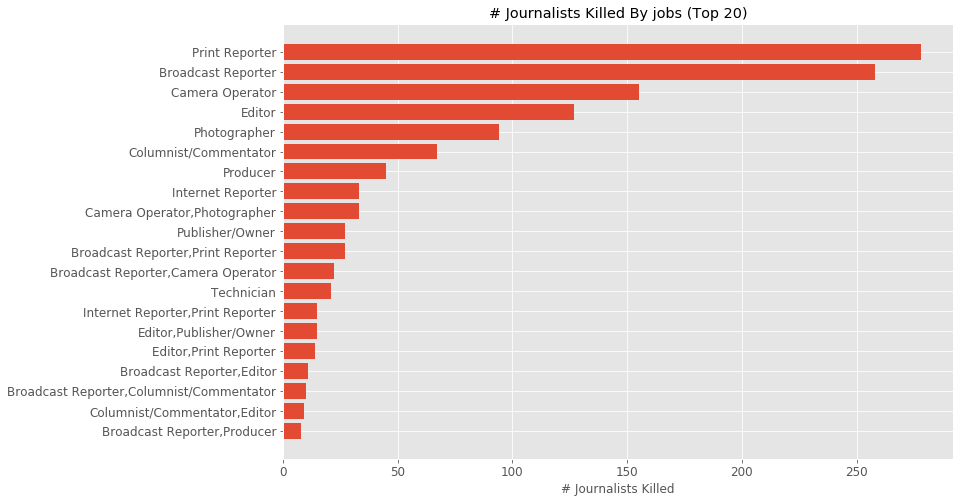

In [29]:
plot_hbar_category_count(cpj, 'jobs', 20)

#plt.savefig('../images/TotalDeathsByJob.png',bbox_inches='tight')

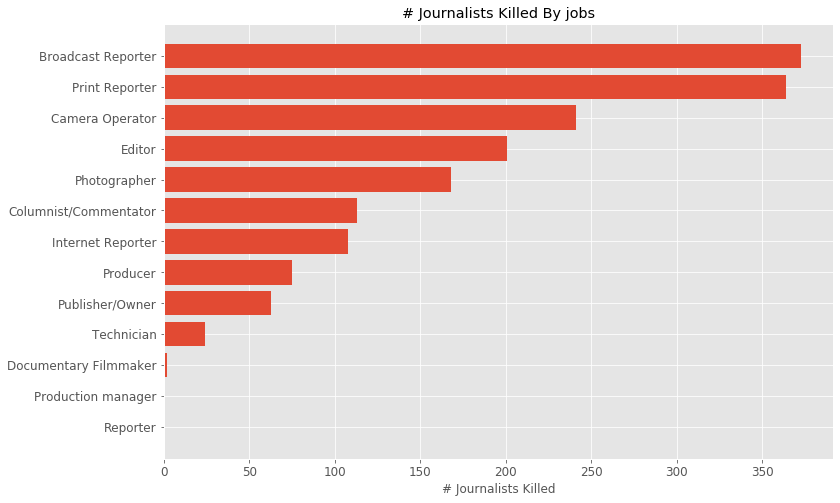

In [49]:
plot_hbar_category_count_multiplecats(cpj, 'jobs', dropna=True)
#plt.savefig('../images/TotalDeathsByJob.png',bbox_inches='tight')

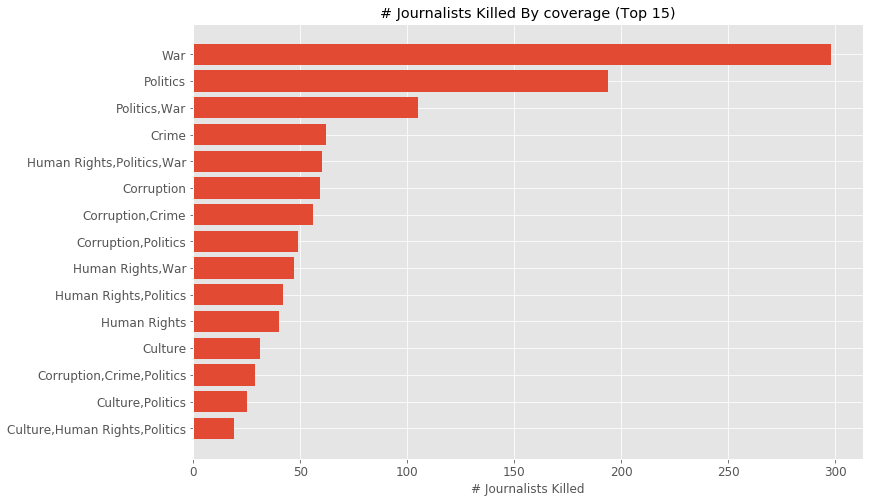

In [34]:
plot_hbar_category_count(cpj, 'coverage',15)
#plt.savefig('../images/TotalDeathsByCoverage.png',bbox_inches='tight')

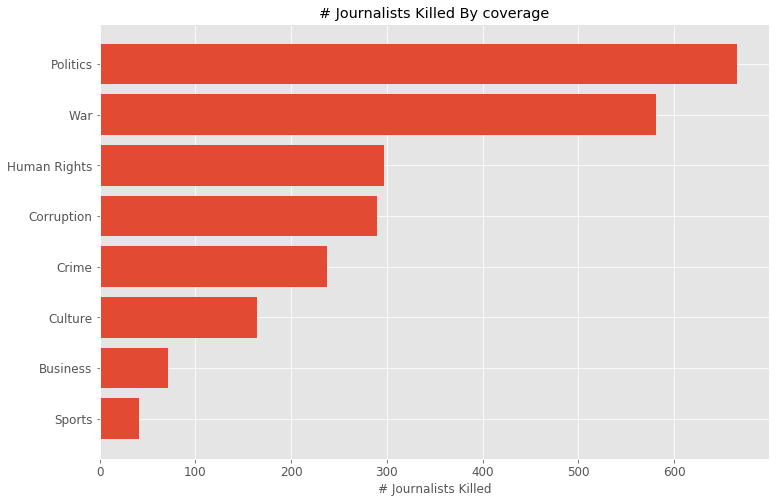

In [35]:
plot_hbar_category_count_multiplecats(cpj, 'coverage', dropna=True)
#plt.savefig('../images/TotalDeathsByCoverage.png',bbox_inches='tight')

Make stacked bar chart showing different genders.

In [ ]:
cpj_GB_yeargender_count = cpj.groupby(['year','gender']).count().unstack(fill_value=0).stack().reset_index().loc[:,['year','gender','combinedStatus']]

#
#cpj_GB_yeargender_count=cpj_GB_yeargender_count[cpj_GB_yeargender_count['year']<2020]
cpj_GB_yeargender_count.rename(columns={'combinedStatus':'Count'},inplace=True)
cpj_GB_yeargender_count

fig, ax = plt.subplots(1,figsize=(12,6))
ax.bar(cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Female']['year'],cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Female']['Count'],color='red',label='female')
ax.bar(cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Male']['year'],cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Male']['Count'],color='blue', label='male',bottom=cpj_GB_yeargender_count[cpj_GB_yeargender_count['gender']=='Female']['Count'])
#ax.set_xlabel('Year')
ax.legend()

#ax.set_ylabel('# Journalists Killed')
ax.set_title('# Journalists Killed Per Year')

#plt.savefig('../images/TotalDeathsVsYear_GenderStack.png',bbox_inches='tight')

In [ ]:
plot_hbar_category_count(cpj, 'country', 20)

#plt.savefig('../images/TotalDeathsByCountry.png',bbox_inches='tight')

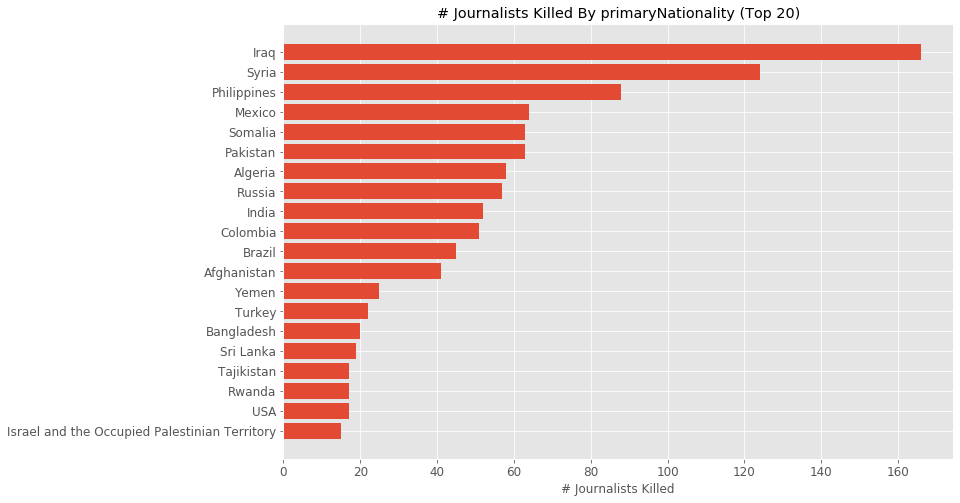

In [38]:
plot_hbar_category_count(cpj, 'primaryNationality',20)

#plt.savefig('../images/TotalDeathsByNationality.png',bbox_inches='tight')

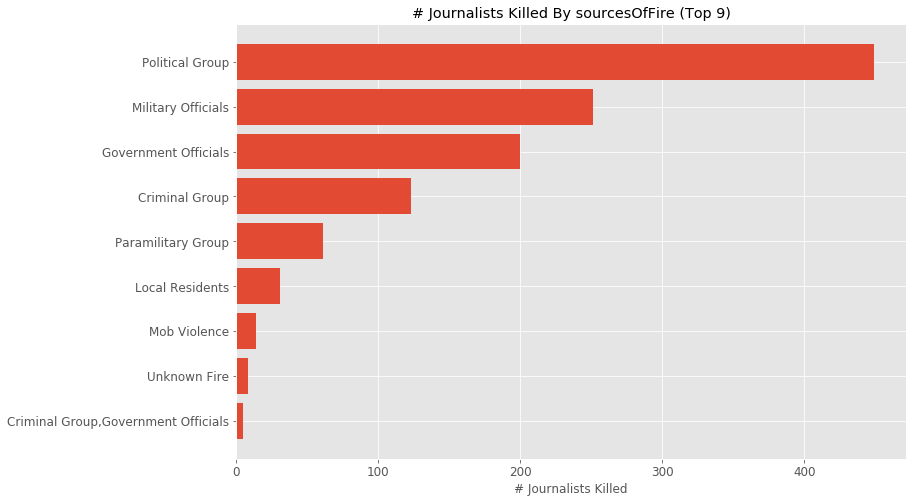

In [39]:
plot_hbar_category_count(cpj, 'sourcesOfFire',9)
#plt.savefig('../images/TotalDeathsBysourcesOfFire.png',bbox_inches='tight')

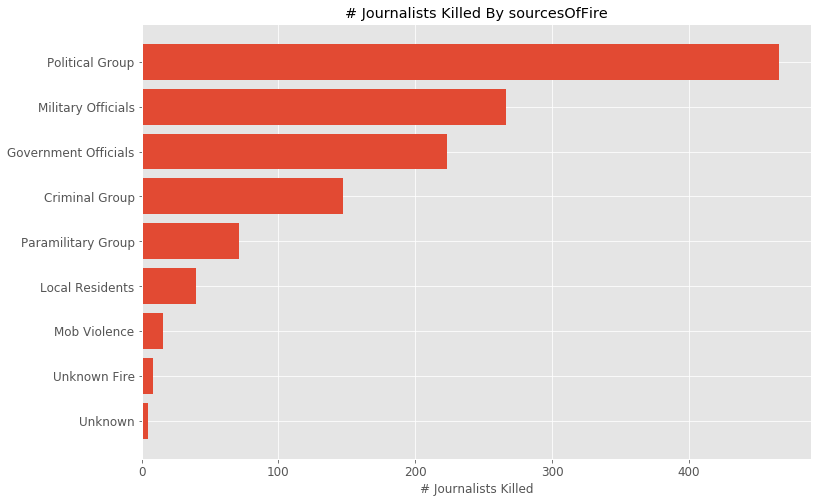

In [50]:
plot_hbar_category_count_multiplecats(cpj, 'sourcesOfFire', dropna=True)
#plt.savefig('../images/TotalDeathsBysourcesOfFire.png',bbox_inches='tight')

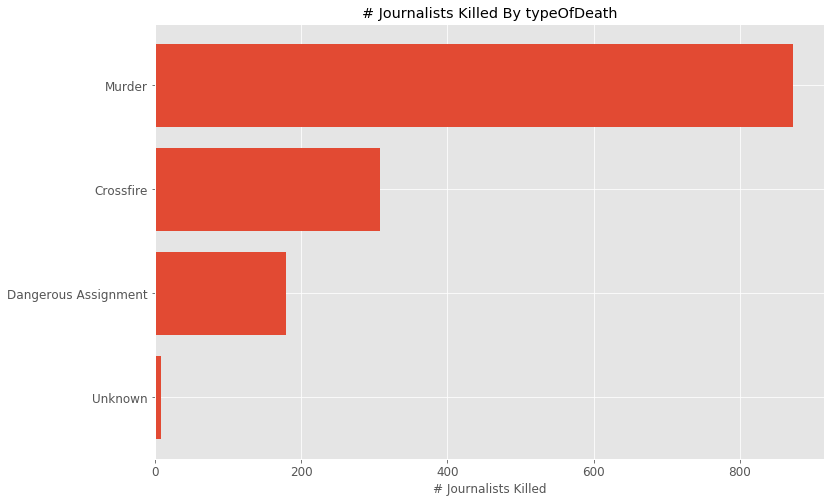

In [41]:
plot_hbar_category_count(cpj, 'typeOfDeath', dropna=False)
#plt.savefig('../images/TotalDeathsByTypeOfDeath.png',bbox_inches='tight')